In [580]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [581]:
import warnings
warnings.filterwarnings('ignore')

In [582]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [583]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [584]:
train_C2H6

,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Pe_ef_C2H6,Pe_ef_iC4H10,Pe_ef_nC4H10,G_B_C2H6
0,-0.489581,-2.242475,0.181389,0.840950,-0.190170,0.050865,0.314730,3.261401
1,-0.246485,-1.218358,0.068624,0.481135,-0.143749,0.032065,0.202253,3.287555
2,-0.170814,-0.395380,0.087099,0.311532,0.593639,-0.276994,0.681598,3.286083
3,-0.233986,-0.463693,0.114547,0.348560,4.228007,-0.633937,-1.644281,3.287569
4,-0.301800,-0.794489,0.143525,0.452051,-0.320362,0.147523,0.748477,3.287977
...,...,...,...,...,...,...,...,...
5793,0.095377,0.345583,-0.054820,0.847071,0.095377,-0.054820,0.847071,3.724439
5794,0.088310,0.321786,-0.052383,0.860643,0.088310,-0.052383,0.860643,3.723858
5795,0.087729,0.322552,-0.046410,0.873357,0.087729,-0.046410,0.873357,3.726206
5796,0.090077,0.329129,-0.040364,0.884950,0.090077,-0.040364,0.884950,3.731592


In [585]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [586]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [587]:
train_C3H8

,B_rate,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Pe_ef_C2H6,Pe_ef_iC4H10,Pe_ef_nC4H10,G_B_C3H8
0,71.591090,3.507886,28.822011,12.256473,16.885985,3.126080,3.057606,406691.601290,-0.489581,-2.242475,0.181389,0.840950,-0.190170,0.050865,0.314730,27.603653
1,71.707246,3.458369,28.179261,12.278466,17.072465,3.231570,3.179062,404402.122607,-0.246485,-1.218358,0.068624,0.481135,-0.143749,0.032065,0.202253,27.783881
2,71.811607,3.520068,28.198436,12.246353,17.025021,3.225281,3.171124,405816.722617,-0.170814,-0.395380,0.087099,0.311532,0.593639,-0.276994,0.681598,27.734744
3,71.904943,3.589369,28.473852,12.208397,16.906464,3.179006,3.117977,407882.237062,-0.233986,-0.463693,0.114547,0.348560,4.228007,-0.633937,-1.644281,27.679363
4,71.996468,3.594282,28.625395,12.207304,16.856159,3.151423,3.087142,408308.687585,-0.301800,-0.794489,0.143525,0.452051,-0.320362,0.147523,0.748477,27.624403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.327170,3.636129,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.095377,0.345583,-0.054820,0.847071,0.095377,-0.054820,0.847071,26.576845
5794,74.327170,3.636129,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.088310,0.321786,-0.052383,0.860643,0.088310,-0.052383,0.860643,26.577611
5795,74.327170,3.636129,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.087729,0.322552,-0.046410,0.873357,0.087729,-0.046410,0.873357,26.584188
5796,74.327170,3.636129,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.090077,0.329129,-0.040364,0.884950,0.090077,-0.040364,0.884950,26.611472


In [588]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [589]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [590]:
train_iC4H10

,B_rate,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Pe_ef_C2H6,Pe_ef_iC4H10,Pe_ef_nC4H10,G_B_iC4H10
0,71.591090,28.822011,12.256473,16.885985,3.126080,3.057606,406691.601290,-0.489581,-2.242475,0.181389,0.840950,-0.190170,0.050865,0.314730,12.325097
1,71.707246,28.179261,12.278466,17.072465,3.231570,3.179062,404402.122607,-0.246485,-1.218358,0.068624,0.481135,-0.143749,0.032065,0.202253,12.365565
2,71.811607,28.198436,12.246353,17.025021,3.225281,3.171124,405816.722617,-0.170814,-0.395380,0.087099,0.311532,0.593639,-0.276994,0.681598,12.360900
3,71.904943,28.473852,12.208397,16.906464,3.179006,3.117977,407882.237062,-0.233986,-0.463693,0.114547,0.348560,4.228007,-0.633937,-1.644281,12.351922
4,71.996468,28.625395,12.207304,16.856159,3.151423,3.087142,408308.687585,-0.301800,-0.794489,0.143525,0.452051,-0.320362,0.147523,0.748477,12.340423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.327170,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.095377,0.345583,-0.054820,0.847071,0.095377,-0.054820,0.847071,11.890119
5794,74.327170,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.088310,0.321786,-0.052383,0.860643,0.088310,-0.052383,0.860643,11.896092
5795,74.327170,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.087729,0.322552,-0.046410,0.873357,0.087729,-0.046410,0.873357,11.902138
5796,74.327170,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.090077,0.329129,-0.040364,0.884950,0.090077,-0.040364,0.884950,11.912305


In [591]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [592]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [593]:
train_nC4H10

,B_rate,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Pe_ef_C2H6,Pe_ef_iC4H10,Pe_ef_nC4H10,G_B_nC4H10
0,71.591090,28.822011,12.256473,16.885985,3.126080,3.057606,406691.601290,-0.489581,-2.242475,0.181389,0.840950,-0.190170,0.050865,0.314730,17.367120
1,71.707246,28.179261,12.278466,17.072465,3.231570,3.179062,404402.122607,-0.246485,-1.218358,0.068624,0.481135,-0.143749,0.032065,0.202253,17.383997
2,71.811607,28.198436,12.246353,17.025021,3.225281,3.171124,405816.722617,-0.170814,-0.395380,0.087099,0.311532,0.593639,-0.276994,0.681598,17.373582
3,71.904943,28.473852,12.208397,16.906464,3.179006,3.117977,407882.237062,-0.233986,-0.463693,0.114547,0.348560,4.228007,-0.633937,-1.644281,17.358515
4,71.996468,28.625395,12.207304,16.856159,3.151423,3.087142,408308.687585,-0.301800,-0.794489,0.143525,0.452051,-0.320362,0.147523,0.748477,17.339268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.327170,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.095377,0.345583,-0.054820,0.847071,0.095377,-0.054820,0.847071,18.183877
5794,74.327170,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.088310,0.321786,-0.052383,0.860643,0.088310,-0.052383,0.860643,18.196591
5795,74.327170,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.087729,0.322552,-0.046410,0.873357,0.087729,-0.046410,0.873357,18.208185
5796,74.327170,26.255059,11.942501,17.323235,4.126496,3.584743,419502.620400,0.090077,0.329129,-0.040364,0.884950,0.090077,-0.040364,0.884950,18.215905


In [594]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [595]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [596]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [597]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [598]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [599]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [600]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [601]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [602]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [603]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.2594361629992858

In [604]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.3259456244142763, max:0.5324769744705629, min:0.17297265398928302, std:0.1515127959192656


In [605]:
lr_scoring

array([0.53247697, 0.48540433, 0.17297265, 0.20198015, 0.23689401])

In [606]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.39538534344159587, max:0.9816453075395006, min:0.20369684543749486, std:0.2960496160684679


In [354]:
lr_scoring

array([0.59792099, 0.49817546, 0.23495306, 0.2614317 , 0.20648175])

### C3H8

In [355]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [356]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.15835100306488173

In [357]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.05633273982780884, max:0.07268187191972757, min:0.045330517429979754, std:0.009900719671343837


In [358]:
lr_scoring

array([0.05302079, 0.06197629, 0.04865423, 0.04533052, 0.07268187])

In [359]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.11539248449445635, max:0.22544749600600467, min:0.04602393134351394, std:0.06883963276253525


In [360]:
lr_scoring

array([0.2254475 , 0.16611418, 0.07284738, 0.04602393, 0.06652944])

### iC4H10

In [361]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [362]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.06093623976304668

In [363]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.02307730130749676, max:0.029979548958804184, min:0.01435174827583185, std:0.006015877563557718


In [364]:
lr_scoring

array([0.01435175, 0.02945909, 0.02253881, 0.01905731, 0.02997955])

In [365]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.04054252443447203, max:0.07594993940998629, min:0.02051654875680627, std:0.021697512952876936


In [366]:
lr_scoring

array([0.05494188, 0.07594994, 0.02073298, 0.02051655, 0.03057127])

### nC4H10

In [367]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [368]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.09163107352143517

In [369]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.03216582526208207, max:0.041460804024057905, min:0.02622556022026479, std:0.00694439039180508


In [370]:
lr_scoring

array([0.02652903, 0.0414608 , 0.02678529, 0.02622556, 0.03982845])

In [371]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.05672121923682187, max:0.1053395218144474, min:0.02825627717570983, std:0.030226123630954796


In [372]:
lr_scoring

array([0.10533952, 0.07799222, 0.02825628, 0.02954156, 0.04247652])

# lasso_regressor

### C2H6

In [373]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = lasso_regressor.predict(X_test_C2H6)

In [374]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.4162950366006424

In [375]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.5957216271033932, max:1.0018036768710383, min:0.29398008233525513, std:0.28133248390202437


In [376]:
ls_scoring

array([1.00180368, 0.84973102, 0.34217886, 0.29398008, 0.4909145 ])

In [377]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [378]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [379]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [380]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.12 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [381]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [382]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.5822012960159739
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [383]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.4162950366006424

In [384]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [385]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.04 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [386]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [387]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.5957216271033932
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [388]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.4162950366006424

### C3H8

In [389]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = lasso_regressor.predict(X_test_C3H8)

In [390]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.1926029644973966

In [391]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.2364270210487265, max:2.016694351489674, min:0.6303105979689854, std:0.4642024404327478


In [392]:
ls_scoring

array([1.35945757, 0.94304269, 1.2326299 , 0.6303106 , 2.01669435])

In [393]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.6565963674315705, max:2.5204620036431766, min:1.035398739091584, std:0.5625522791400981


In [394]:
ls_scoring

array([2.520462  , 1.03539874, 1.2550227 , 1.36437186, 2.10772654])

In [395]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [396]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [397]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [398]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.68 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [399]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [400]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.9601789728150755
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [401]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7171198959377805

In [402]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [403]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.48 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [404]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [405]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.4495780028626932
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [406]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7171198959377805

### iC4H10

In [407]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = lasso_regressor.predict(X_test_iC4H10)

In [408]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.290910551352611

In [409]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:0.7469693763760366, max:0.9750641846125793, min:0.5348318560786032, std:0.16830491287269106


In [410]:
ls_scoring

array([0.75160153, 0.97506418, 0.53483186, 0.58772881, 0.8856205 ])

In [411]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.7529282890697383, max:0.9725284893339895, min:0.6287469362408177, std:0.11938207670295464


In [412]:
ls_scoring

array([0.76628269, 0.72611879, 0.62874694, 0.67096454, 0.97252849])

In [413]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [414]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [415]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [416]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.45 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [417]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [418]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6223232327536842
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [419]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.2290017091796452

In [420]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [421]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.19 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [422]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [423]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6961089710274643
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [424]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.2290017091796452

### nC4H10

In [425]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = lasso_regressor.predict(X_test_nC4H10)

In [426]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.9713524551349815

In [427]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:0.9468021544971181, max:1.373571351325502, min:0.7216784095694216, std:0.25991860945664874


In [428]:
ls_scoring

array([0.72167841, 1.37357135, 0.7722833 , 0.74068884, 1.12578887])

In [429]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.0390464574320522, max:1.269749541325258, min:0.7979512555238216, std:0.19962858310854117


In [430]:
ls_scoring

array([1.17958735, 0.80122087, 1.14672326, 0.79795126, 1.26974954])

In [431]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [432]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [433]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [434]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.53 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [435]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [436]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6827254627743614
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [437]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.7601945429423715

In [438]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [439]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.18 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [440]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [441]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.8868653609004625
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [442]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.7601945429423715

# Ridge regressor

### C2H6

In [443]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = ridge_regressor.predict(X_test_C2H6)

In [444]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

3.4301381787700045

In [445]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.33511526983486895, max:0.5368902408469193, min:0.1679591399655756, std:0.16292086674757073


In [446]:
rd_scoring

array([0.53689024, 0.52956986, 0.16795914, 0.2181468 , 0.22301031])

In [447]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.403194010832325, max:0.9853346004304656, min:0.2191409024524596, std:0.294267785884494


In [448]:
rd_scoring

array([0.9853346 , 0.33960408, 0.22554207, 0.2463484 , 0.2191409 ])

In [449]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [450]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [451]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [452]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.16 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [453]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [454]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.5822012960159739
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [455]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.4162950366006424

In [456]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [457]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.06 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [458]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [459]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.5957216271033932
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [460]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.4162950366006424

### C3H8

In [461]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = ridge_regressor.predict(X_test_C3H8)

In [462]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.1523118533817356

In [463]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.05620317696670592, max:0.07371951715519805, min:0.04622280634143768, std:0.009712709804778554


In [464]:
rd_scoring

array([0.05176782, 0.05916809, 0.05013765, 0.04622281, 0.07371952])

In [465]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.12783313730257745, max:0.22988614196513202, min:0.04928267212732788, std:0.06786732888354786


In [466]:
rd_scoring

array([0.17768574, 0.22988614, 0.11634594, 0.04928267, 0.06596519])

In [467]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [468]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [469]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [470]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.57 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [471]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [472]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.9601789728150755
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [473]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7171198959377805

In [474]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [475]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.42 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [476]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [477]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.4495780028626932
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [478]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7171198959377805

### iC4H10

In [479]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = ridge_regressor.predict(X_test_iC4H10)

In [480]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.07564752986833963

In [481]:
rd_scoring = cross_val_score(ridge_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.02280916460721325, max:0.03222279498442309, min:0.013248049403413911, std:0.0061773880150574915


In [482]:
rd_scoring

array([0.01324805, 0.03222279, 0.02353353, 0.02027594, 0.02476551])

In [483]:
rd_scoring = cross_val_score(ridge_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.05019272551472419, max:0.1084051006606916, min:0.017124999888191585, std:0.034762506622987514


In [484]:
rd_scoring

array([0.07175138, 0.1084051 , 0.02836249, 0.017125  , 0.02531966])

In [485]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [486]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [487]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [488]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.4 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [489]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [490]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6223232327536842
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [491]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.2290017091796452

In [492]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [493]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.3 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [494]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [495]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6961089710274643
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [496]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.2290017091796452

### nC4H10

In [497]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = ridge_regressor.predict(X_test_nC4H10)

In [498]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.0775963929565468

In [499]:
rd_scoring = cross_val_score(ridge_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.03272680702017957, max:0.05067199312191084, min:0.026858495028656424, std:0.009097238090513321


In [500]:
rd_scoring

array([0.02686286, 0.05067199, 0.02827019, 0.0268585 , 0.03097049])

In [501]:
rd_scoring = cross_val_score(ridge_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.06626384106341189, max:0.14897158847117184, min:0.02706430451677486, std:0.045299964620132534


In [502]:
rd_scoring

array([0.14897159, 0.08016751, 0.04213418, 0.0270643 , 0.03298162])

In [503]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [504]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [505]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [506]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.47 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [507]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [508]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6827254627743614
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [509]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.7601945429423715

In [510]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [511]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.13 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [512]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [513]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.8868653609004625
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [514]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.7601945429423715

# SGDRegressor

### C2H6

In [607]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [608]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.3433478559847696

In [609]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.32878884200887126, max:0.5185885681398317, min:0.14219911120373488, std:0.15417555969820412


In [610]:
SGD_scoring

array([0.50645586, 0.51858857, 0.14219911, 0.24494713, 0.23175354])

In [611]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:0.3868772608077379, max:0.9308377026067142, min:0.20200550600910588, std:0.27569099336834263


In [520]:
SGD_scoring

array([0.91122117, 0.35338475, 0.20765329, 0.2170801 , 0.25379736])

In [521]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [522]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [523]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [524]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 11.4 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [525]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=5e-05, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [526]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.3296895931807563
{'tol': 1, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.01, 'alpha': 5e-05}


In [527]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0704737095426538

In [528]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [529]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 8.38 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [530]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [531]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.4230019714603603
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l1', 'eta0': 0.01, 'alpha': 0.0001}


In [532]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.062627334815187

### C3H8

In [533]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = SGD_regressor.predict(X_test_C3H8)

In [534]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

4.777714940841167

In [535]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.4237485071544594, max:0.49726581268165715, min:0.3634056215787871, std:0.05405748858256256


In [536]:
SGD_scoring

array([0.39979108, 0.47880342, 0.36340562, 0.49726581, 0.37947661])

In [537]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:1.06072590777778, max:2.3658405551918773, min:0.3182385378067366, std:0.754969811685241


In [268]:
SGD_scoring

array([2.60414039, 1.3673823 , 0.88789033, 0.31978242, 0.3766188 ])

In [269]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [270]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [271]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [272]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 17.9 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [273]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [274]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.7363746130960185
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.01, 'alpha': 0.001}


In [275]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

6.268798646844518

In [276]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [277]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 13 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [278]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [279]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-4.0241662820764175
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l1', 'eta0': 0.01, 'alpha': 0.0001}


In [280]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

7.647286970418953

### iC4H10

In [281]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = SGD_regressor.predict(X_test_iC4H10)

In [282]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

2.2692722952285362

In [283]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.20199800320737848, max:0.2640387760434448, min:0.12658326963259614, std:0.053947497319744415


In [284]:
SGD_scoring

array([0.12658327, 0.16396617, 0.26403878, 0.26122346, 0.19417834])

In [285]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:0.6701632226047016, max:1.5221155745066468, min:0.08769621252683725, std:0.516904464391334


In [286]:
SGD_scoring

array([1.52211557, 0.55857613, 0.94188695, 0.24054125, 0.08769621])

In [287]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [288]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [289]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [290]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 15.5 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [291]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [292]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.3485042428684527
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.01, 'alpha': 0.001}


In [293]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

2.821022652702885

In [294]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [295]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 11.7 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [296]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [297]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.757183504478501
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l1', 'eta0': 0.01, 'alpha': 0.0001}


In [298]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

3.236192693411958

### nC4H10

In [299]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = SGD_regressor.predict(X_test_nC4H10)

In [300]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

3.0021974977746546

In [301]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.29474817567541256, max:0.42356749772887686, min:0.1907064036058969, std:0.10451748538467633


In [302]:
SGD_scoring

array([0.1907064 , 0.4235675 , 0.42053366, 0.21478617, 0.22414714])

In [303]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:0.8665278250416535, max:2.043822585608204, min:0.13995791396360316, std:0.6828405040760629


In [304]:
SGD_scoring

array([2.04382259, 1.07814049, 0.81221966, 0.25849848, 0.13995791])

In [305]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [306]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [307]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [308]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 16.7 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [309]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [310]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.5560843941512569
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.01, 'alpha': 0.001}


In [311]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

3.71580036199131

In [312]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [313]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 11.8 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [314]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [315]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-2.4941530067256057
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l1', 'eta0': 0.01, 'alpha': 0.0001}


In [316]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

4.380232174526222

# GradientBoostingRegressor

### C2H6

In [189]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C2H6, y_train_C2H6)
predictions = estimator.predict(X_test_C2H6)

In [190]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.939360895455012

In [191]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.5593182852215015, max:1.0360100217048316, min:0.25284684086654813, std:0.25989936500215416


In [192]:
GBR_scoring

array([0.56713064, 1.03601002, 0.45200172, 0.25284684, 0.4886022 ])

In [193]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.5788642716645688, max:1.367452491755013, min:0.21290356802529675, std:0.4191321989856376


In [194]:
GBR_scoring

array([1.36745249, 0.5279375 , 0.23350508, 0.21290357, 0.55252272])

In [195]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [196]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [197]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [198]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [199]:
#randomized_grid_cv.best_estimator_

In [200]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [201]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

In [202]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [203]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [204]:
#randomized_grid_cv.best_estimator_

In [205]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [206]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

### C3H8

In [207]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C3H8, y_train_C3H8)
predictions = estimator.predict(X_test_C3H8)

In [208]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.5617206163482593

In [209]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:1.9696655946622497, max:6.904973083120839, min:0.5941350603182052, std:2.470462301360791


In [210]:
GBR_scoring

array([0.73649721, 6.90497308, 0.94657128, 0.59413506, 0.66615133])

In [211]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:2.5175307725505798, max:7.539020025358695, min:0.601855304227724, std:2.6339313786544367


In [212]:
GBR_scoring

array([7.53902003, 2.78332234, 0.6018553 , 0.98712955, 0.67632664])

In [213]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [214]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [215]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [216]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [217]:
#randomized_grid_cv.best_estimator_

In [218]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [219]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

In [220]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [221]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [222]:
#randomized_grid_cv.best_estimator_

In [223]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [224]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

### iC4H10

In [225]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_iC4H10, y_train_iC4H10)
predictions = estimator.predict(X_test_iC4H10)

In [226]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8146948684928854

In [227]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.9193865101346195, max:3.323653628588124, min:0.270790635025354, std:1.2025443322392484


In [228]:
GBR_scoring

array([0.32884451, 3.32365363, 0.27079064, 0.3061263 , 0.36751748])

In [229]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.039031655737991, max:2.8904769148540272, min:0.27198460909576744, std:0.9897378956915628


In [230]:
GBR_scoring

array([2.89047691, 1.24884112, 0.27198461, 0.40162399, 0.38223164])

In [231]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [232]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [233]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [234]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [235]:
#randomized_grid_cv.best_estimator_

In [236]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [237]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

In [238]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [239]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [240]:
#randomized_grid_cv.best_estimator_

In [241]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [242]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

### nC4H10

In [243]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_nC4H10, y_train_nC4H10)
predictions = estimator.predict(X_test_nC4H10)

In [244]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1327008312239277

In [245]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:1.1904903460234426, max:4.338407009156744, min:0.24048811274377777, std:1.579601504140353


In [246]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.4258521718660473, max:4.006918000443228, min:0.28470224647800385, std:1.4272380947535834


In [247]:
GBR_scoring

array([4.006918  , 1.9554628 , 0.46246814, 0.28470225, 0.41970968])

In [248]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [249]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [250]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [251]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [252]:
#randomized_grid_cv.best_estimator_

In [253]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [254]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

In [255]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [256]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [257]:
#randomized_grid_cv.best_estimator_

In [258]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [259]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

# Prediction

In [612]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [613]:
test_data

,A_rate,B_rate,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C3H8,Pe_ef_iC4H10,Pe_ef_nC4H10,Re_A,timestamp,w_A,w_prev
0,71.730325,74.327170,0.095464,0.009113,0.356414,0.127031,-0.030196,0.000912,0.892671,0.796861,3.636129,26.255059,4.633160,0.190541,11.942501,4.126496,17.323235,3.584743,3.734775,26.598989,11.915135,18.222885,0.095464,0.356414,-0.030196,0.892671,419502.620400,2020-04-30 23:30:00,0.282014,0.282014
1,71.428342,74.273009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419019.690291,2020-05-01 00:00:00,0.281026,NaN
2,71.176730,74.167421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417716.031332,2020-05-01 00:30:00,0.280066,NaN
3,71.115060,74.063703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417677.086653,2020-05-01 01:00:00,0.279884,NaN
4,71.079396,73.985463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418092.480177,2020-05-01 01:30:00,0.279844,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,68.304891,71.147451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.749937,27.047878,4.132746,0.081633,12.083220,3.131494,16.478626,2.564446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380844.777764,2020-07-22 21:30:00,0.268524,NaN
3981,68.632519,71.256112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.756247,27.134846,4.207451,0.081756,12.122493,3.156155,16.548577,2.589827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382368.259444,2020-07-22 22:00:00,0.269746,NaN
3982,69.834182,71.607384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.795420,27.581964,4.311932,0.083086,12.322751,3.219705,16.837526,2.645874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388821.338979,2020-07-22 22:30:00,0.274419,NaN
3983,71.735081,72.582642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.863233,28.320698,4.442151,0.085586,12.650781,3.312669,17.297763,2.725052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399288.163412,2020-07-22 23:00:00,0.281859,NaN


In [614]:
rg_C2H6 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [615]:
for i in range(1,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-1, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-1,'G_B_C2H6'] - test_data.loc[i-1,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-1,'G_B_C3H8'] - test_data.loc[i-1,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-1,'G_B_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-1,'G_B_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    a_C2H6 = (test_data.loc[i,'G_A_C2H6'] - test_data.loc[i-1,'G_A_C2H6']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C2H6']
    E_C2H6 = a_C2H6 / test_data.loc[i,'Cx_A_C2H6**2']
    
    a_C3H8 = (test_data.loc[i,'G_A_C3H8'] - test_data.loc[i-1,'G_A_C3H8']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C3H8']
    E_C3H8 = a_C3H8 / test_data.loc[i,'Cx_A_C3H8**2']
    
    a_iC4H10 = (test_data.loc[i,'G_A_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_iC4H10']
    E_iC4H10 = a_iC4H10 / test_data.loc[i,'Cx_A_iC4H10**2']
    
    a_nC4H10 = (test_data.loc[i,'G_A_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_nC4H10']
    E_nC4H10 = a_nC4H10 / test_data.loc[i,'Cx_A_nC4H10**2']
    
    test_data.loc[[i],['Pe_ef_C2H6']] = test_data.loc[i,'w_prev'] / E_C2H6
    test_data.loc[[i],['Pe_ef_C3H8']] = test_data.loc[i,'w_prev'] / E_C3H8
    test_data.loc[[i],['Pe_ef_iC4H10']] = test_data.loc[i,'w_prev'] / E_iC4H10
    test_data.loc[[i],['Pe_ef_nC4H10']] = test_data.loc[i,'w_prev'] / E_nC4H10
    
    #print(3)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(4)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(5)
    
    #Если не убирать шумы в исходных данных для сходимости алгоритма нужен следующий код:
    for j in ['G_B_C2H6','G_B_C3H8','G_B_iC4H10','G_B_nC4H10']:
        if test_data.loc[i,j] < 0:
            test_data.loc[[i],[j]] = test_data.loc[i-1,j]
            
    x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_nC4H10']]
    
    if abs(np.array(x).sum()) > test_data.loc[i, "B_rate"]:
        test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i, "G_B_C2H6"].mean()
        test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i, "G_B_C3H8"].mean()
        test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i, "G_B_iC4H10"].mean()
        test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i, "G_B_nC4H10"].mean()
        
    #print(i)

In [616]:
test_data[:]

,A_rate,B_rate,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C3H8,Pe_ef_iC4H10,Pe_ef_nC4H10,Re_A,timestamp,w_A,w_prev
0,71.730325,74.327170,0.095464,0.009113,0.356414,0.127031,-0.030196,0.000912,0.892671,0.796861,3.636129,26.255059,4.633160,0.190541,11.942501,4.126496,17.323235,3.584743,3.734775,26.598989,11.915135,18.222885,0.095464,0.356414,-0.030196,0.892671,419502.620400,2020-04-30 23:30:00,0.282014,0.282014
1,71.428342,74.273009,0.098647,0.009731,0.343930,0.118288,-0.027366,0.000749,0.899651,0.809371,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,2.488788,25.857205,11.623100,17.320835,0.046007,0.239414,-0.003014,1.934581,419019.690291,2020-05-01 00:00:00,0.281026,0.282014
2,71.176730,74.167421,-1.179170,1.390443,-0.440196,0.193773,-0.257048,0.066074,0.133328,0.017776,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,2.297621,25.730013,11.314897,17.037454,-1.152173,-0.275524,-0.173363,-0.243583,417716.031332,2020-05-01 00:30:00,0.280066,0.281026
3,71.115060,74.063703,-1.362573,1.856604,-0.493453,0.243495,-0.530381,0.281304,-0.092075,0.008478,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,2.173728,25.735681,11.055332,16.795773,-1.361587,-0.644112,-0.552978,-0.076207,417677.086653,2020-05-01 01:00:00,0.279884,0.280066
4,71.079396,73.985463,-1.486190,2.208760,-0.520110,0.270514,-0.796016,0.633641,-0.328386,0.107838,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,2.084467,25.788612,10.794525,16.520970,-1.534611,-0.992547,-0.786517,-0.272601,418092.480177,2020-05-01 01:30:00,0.279844,0.279884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,68.304891,71.147451,0.893850,0.798969,14.288816,204.170269,0.160630,0.025802,-4.186414,17.526062,2.749937,27.047878,4.132746,0.081633,12.083220,3.131494,16.478626,2.564446,3.756934,41.801760,12.465440,12.292333,0.851544,14.009778,0.122830,-4.276921,380844.777764,2020-07-22 21:30:00,0.268524,0.267922
3981,68.632519,71.256112,1.006997,1.014044,14.753881,217.677016,0.382220,0.146092,-4.186292,17.525044,2.756247,27.134846,4.207451,0.081756,12.122493,3.156155,16.548577,2.589827,3.635892,40.860280,12.016338,12.370219,0.984033,14.436965,0.276440,-4.464082,382368.259444,2020-07-22 22:00:00,0.269746,0.268524
3982,69.834182,71.607384,0.879645,0.773775,13.725435,188.387553,-0.106155,0.011269,-4.178358,17.458675,2.795420,27.581964,4.311932,0.083086,12.322751,3.219705,16.837526,2.645874,3.671721,41.645797,12.426320,12.536107,0.755002,12.246488,0.017712,-5.618835,388821.338979,2020-07-22 22:30:00,0.274419,0.269746
3983,71.735081,72.582642,0.876301,0.767904,14.063833,197.791395,0.103569,0.010726,-4.301419,18.502206,2.863233,28.320698,4.442151,0.085586,12.650781,3.312669,17.297763,2.725052,3.817245,42.787415,12.946747,12.919382,0.683543,11.804340,0.008258,-7.050362,399288.163412,2020-07-22 23:00:00,0.281859,0.274419


In [617]:
test_data.columns

Index(['A_rate', 'B_rate', 'Cx_A_C2H6', 'Cx_A_C2H6**2', 'Cx_A_C3H8',
       'Cx_A_C3H8**2', 'Cx_A_iC4H10', 'Cx_A_iC4H10**2', 'Cx_A_nC4H10',
       'Cx_A_nC4H10**2', 'G_A_C2H6', 'G_A_C3H8', 'G_A_C6H14', 'G_A_CH4',
       'G_A_iC4H10', 'G_A_iC5H12', 'G_A_nC4H10', 'G_A_nC5H12', 'G_B_C2H6',
       'G_B_C3H8', 'G_B_iC4H10', 'G_B_nC4H10', 'Pe_ef_C2H6', 'Pe_ef_C3H8',
       'Pe_ef_iC4H10', 'Pe_ef_nC4H10', 'Re_A', 'timestamp', 'w_A', 'w_prev'],
      dtype='object')

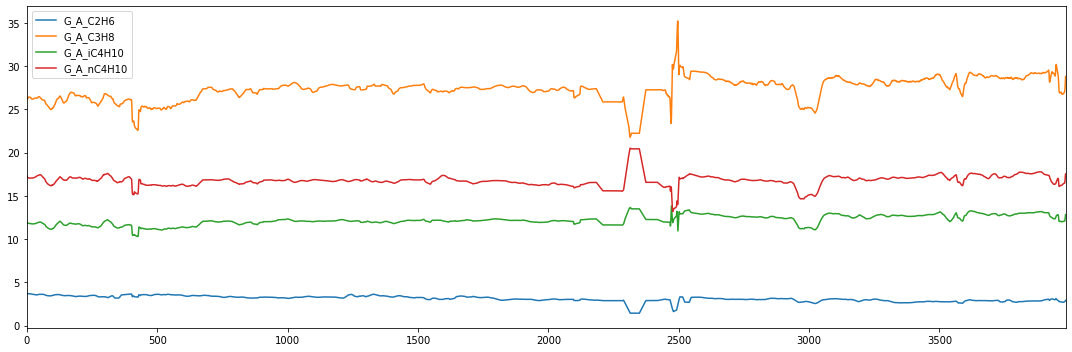

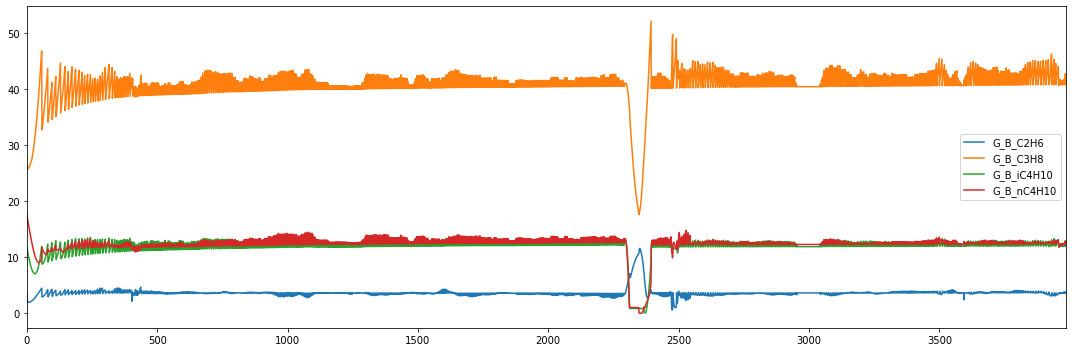

In [618]:
plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_A_C2H6', 'G_A_C3H8','G_A_iC4H10', 'G_A_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_B_C2H6', 'G_B_C3H8','G_B_iC4H10', 'G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [30]:
predict = pd.DataFrame()

In [31]:
predict[['timestamp']] = test_data[['timestamp']]

In [32]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [33]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [34]:
predict = pd.concat([predict,B] , axis=1)

In [35]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-30 23:30:00,5.024778,35.786361,16.030659,24.517125
1,2020-05-01 00:00:00,4.690334,35.856106,15.945433,22.933464
2,2020-05-01 00:30:00,4.497515,35.902013,16.084952,23.110452
3,2020-05-01 01:00:00,4.367247,36.123519,16.215833,23.212837
4,2020-05-01 01:30:00,4.284828,36.346278,16.316195,23.273880
...,...,...,...,...,...
3980,2020-07-22 21:30:00,3.991713,37.046002,16.616591,23.937307
3981,2020-07-22 22:00:00,3.993916,37.037238,16.622707,23.942276
3982,2020-07-22 22:30:00,4.006539,37.185593,16.673816,23.944160
3983,2020-07-22 23:00:00,4.023743,37.241831,16.717671,23.964240


In [36]:
for i in range(0,1):
    predict.drop(i, axis=0, inplace=True)

In [37]:
predict = predict.reset_index(drop=True)

In [38]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.690334,35.856106,15.945433,22.933464
1,2020-05-01 00:30:00,4.497515,35.902013,16.084952,23.110452
2,2020-05-01 01:00:00,4.367247,36.123519,16.215833,23.212837
3,2020-05-01 01:30:00,4.284828,36.346278,16.316195,23.273880
4,2020-05-01 02:00:00,4.225737,36.516047,16.391790,23.319778
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.991713,37.046002,16.616591,23.937307
3980,2020-07-22 22:00:00,3.993916,37.037238,16.622707,23.942276
3981,2020-07-22 22:30:00,4.006539,37.185593,16.673816,23.944160
3982,2020-07-22 23:00:00,4.023743,37.241831,16.717671,23.964240


In [39]:
predict.to_csv('predictSGD_-1_no_pr.csv', sep=',', header=True, index=False)

In [40]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictSGD_-1_no_pr.csv', header = 0, sep = ',')

In [41]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [42]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.690334,35.856106,15.945433,22.933464
1,2020-05-01 00:30:00,4.497515,35.902013,16.084952,23.110452
2,2020-05-01 01:00:00,4.367247,36.123519,16.215833,23.212837
3,2020-05-01 01:30:00,4.284828,36.346278,16.316195,23.273880
4,2020-05-01 02:00:00,4.225737,36.516047,16.391790,23.319778
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.991713,37.046002,16.616591,23.937307
3980,2020-07-22 22:00:00,3.993916,37.037238,16.622707,23.942276
3981,2020-07-22 22:30:00,4.006539,37.185593,16.673816,23.944160
3982,2020-07-22 23:00:00,4.023743,37.241831,16.717671,23.964240


In [43]:
#test_data.to_excel('123.xlsx')